In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
data = pd.read_csv('G7_cleaned.csv', sep=',').drop(columns=['Unnamed: 0'])
data_prev = pd.read_csv('G7_2022_cleaned.csv', sep=',').drop(columns=['Unnamed: 0'])

In [41]:
data = data.groupby(['Country Name','Counterpart Country Name'])['2023Q1'].sum()
data_prev = data_prev.groupby(['Country Name','Counterpart Country Name'])['2022Q1'].sum()

In [42]:
import networkx as nx

In [43]:
def build_graph(data_G7):
    graph = nx.Graph()
    for i in range(len(data_G7)):
        country = data_G7.index.get_level_values(0)[i]
        counterpart = data_G7.index.get_level_values(1)[i]
        graph.add_edge(country, counterpart, weight=data_G7[i])
    return graph

In [44]:
G = build_graph(data)
G_prev = build_graph(data_prev)

/var/folders/wm/r88x234s74db86mtqppjmvq00000gn/T/ipykernel_34030/2131206056.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231)
/var/folders/wm/r88x234s74db86mtqppjmvq00000gn/T/ipykernel_34030/2131206056.py:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(234)


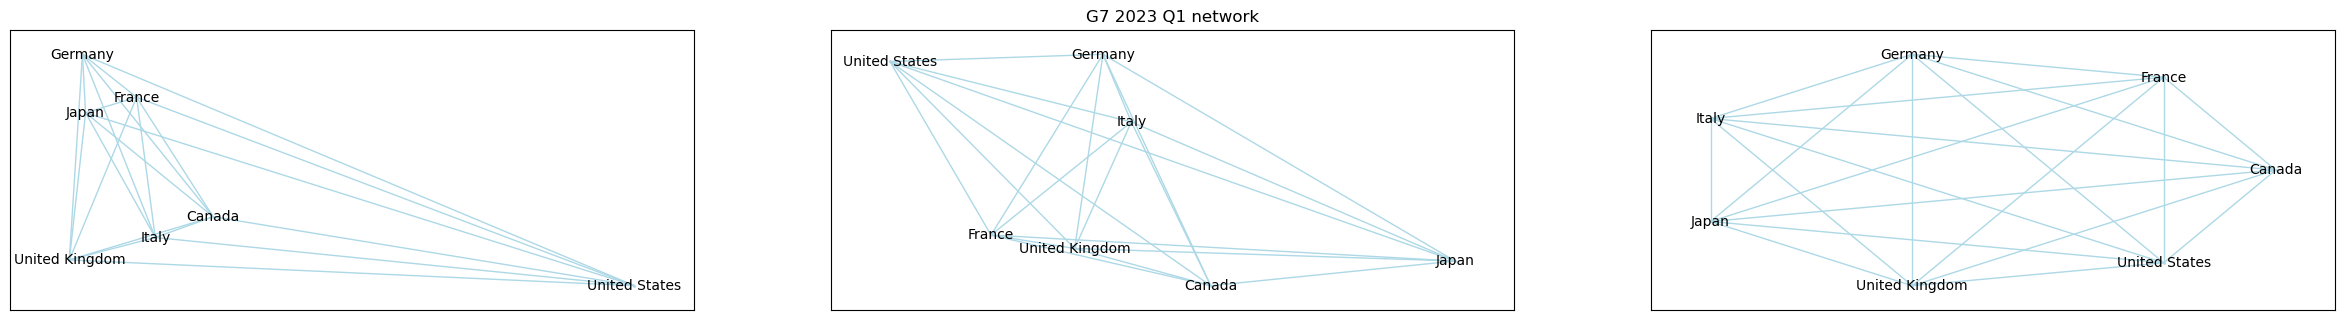

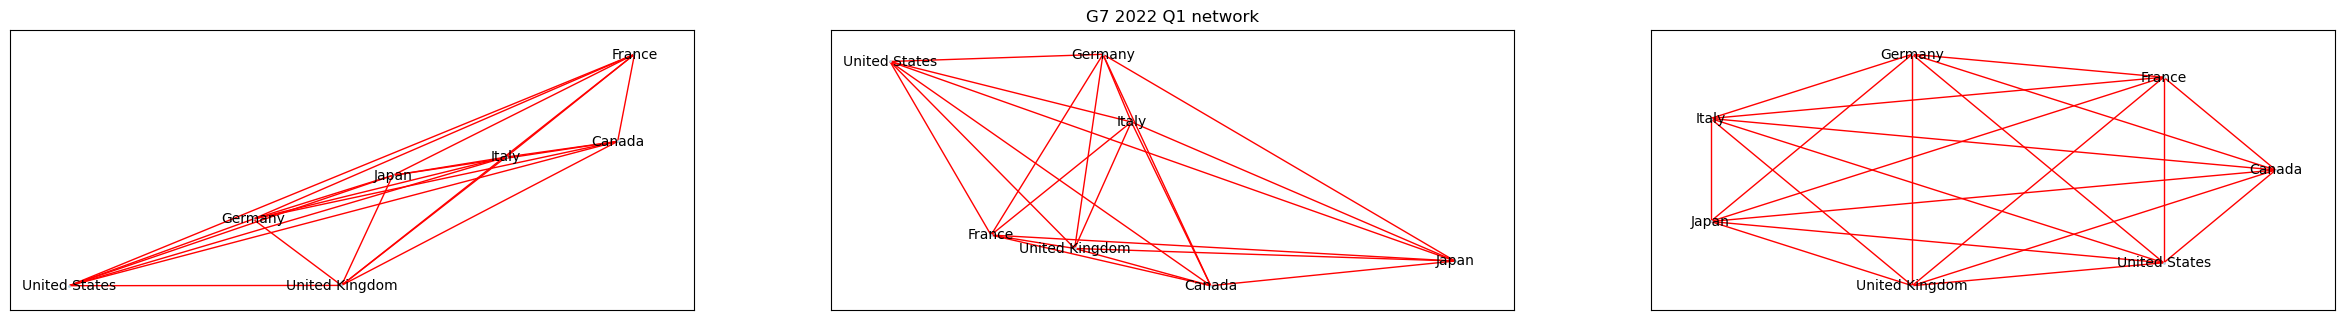

In [45]:
options = {
     'node_color': 'lightblue',
     'edge_color': 'lightblue',
     'node_size': 1,
     'width': 1,
     'alpha': 1.0,
 }

pos=nx.spring_layout(G, seed=50)
plt.subplots(figsize=(30,8))
plt.subplot(231)
nx.draw_networkx(G, pos=pos, with_labels=True, font_size=10,**options)

pos=nx.random_layout(G, seed=50)
plt.subplot(232)
plt.title('G7 2023 Q1 network')
nx.draw_networkx(G, pos=pos, with_labels=True, font_size=10,**options)

pos=nx.circular_layout(G)
plt.subplot(233)
nx.draw_networkx(G, pos=pos, with_labels=True, font_size=10,**options)

options['edge_color'] = 'red'
pos=nx.spring_layout(G_prev, seed=50)
plt.subplots(figsize=(30,8))
plt.subplot(234)
nx.draw_networkx(G_prev, pos=pos, with_labels=True, font_size=10,**options)

pos=nx.random_layout(G_prev, seed=50)
plt.subplot(235)
plt.title('G7 2022 Q1 network')
nx.draw_networkx(G_prev, pos=pos, with_labels=True, font_size=10,**options)

pos=nx.circular_layout(G_prev)
plt.subplot(236)
nx.draw_networkx(G_prev, pos=pos, with_labels=True, font_size=10,**options)

plt.show()